In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


In [2]:
import os
import gc
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
cs_train = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
train_process = cs_train.fillna(cs_train.mean())
features = train_process.columns[2:13]
X = train_process[features]
y = train_process['SeriousDlqin2yrs']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y,random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

array([0.29944594, 0.15268374, 0.12233918, 0.10093157, 0.10012884,
       0.09386178, 0.07368563, 0.05450378, 0.00173201, 0.00068753])

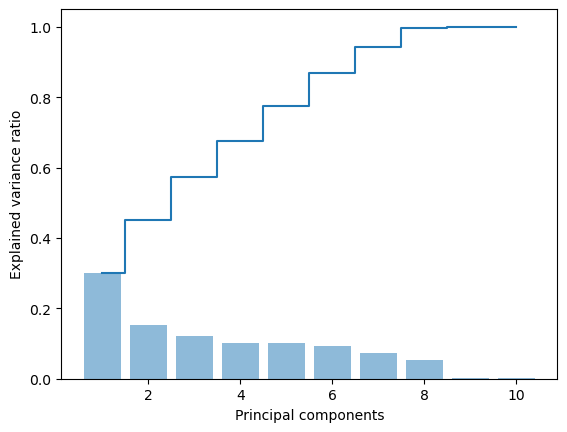

In [4]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
display(pca.explained_variance_ratio_)
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

# The resulting plot indicates that the first principal component alone accounts for approximately 30 percent of the variance. We can see that the first seven principal components combined explain almost 90 percent of the variance in the dataset. So I choose the first seven features to train the model

In [5]:
pipe_svc = make_pipeline(StandardScaler(),
                         PCA(n_components=7),
                         SVC(random_state=1))
param_C_range = [0.1, 1.0, 10.0]
param_gama_range = [0.01, 0.1, 1.0]
param_grid = [{'svc__C': param_C_range, 
               'svc__gamma': param_gama_range, 
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
print('Test accuracy: %.4f' % clf.score(X_test, y_test))

0.9352666666666666
{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}
Test accuracy: 0.9354
